# Техническое задание

Автор: Кузьмин Дмитрий

## Задание

Анализ паттернов плохо распознаваемых EEG-файлов:

* Анализ качества сырых данных
* Анализ распределения признаков
* Анализ баланса классов
* Визуальный анализ EEG
* Анализ предсказаний модели

## Ожидаемые результаты

* Таблица QC-метрик для всех файлов проблемных пациентов
* Таблица баланса классов для всех пациентов
* Графики распределений признаков 
* ROC-кривые для проблемных пацфиентов
* Визуализации EEG — примеры preictal окон

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

## Анализ качества сырых данных

Цель: Выявить проблемы с качеством исходных EEG-записей.

In [2]:
qc_normal_patient = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\analysis\qc_normal_patient.csv')
qc_problem_patient = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\analysis\qc_problem_patient.csv')

In [3]:
qc_normal_patient[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,570.0,570.000000,570.0,570.000000,570.000000
mean,0.0,0.000786,0.0,0.000035,0.001480
std,0.0,0.010886,0.0,0.000017,0.000540
min,0.0,0.000000,0.0,0.000008,0.000333
25%,0.0,0.000000,0.0,0.000024,0.001109
50%,0.0,0.000000,0.0,0.000031,0.001443
75%,0.0,0.000000,0.0,0.000043,0.001743
max,0.0,0.172414,0.0,0.000162,0.003873


In [4]:
qc_normal_patient

,patient,edf_file,edf_path,sampling_rate,n_channels,n_samples,is_good,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude
0,chb01,chb01_01.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001038
1,chb01,chb01_02.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000021,0.001388
2,chb01,chb01_03.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000031,0.000595
3,chb01,chb01_04.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001286
4,chb01,chb01_05.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,chb24,chb24_13.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001118
566,chb24,chb24_14.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000028,0.001254
567,chb24,chb24_15.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001312
568,chb24,chb24_17.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000039,0.001504


In [5]:
qc_problem_patient[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,106.0,106.0,106.0,106.000000,106.000000
mean,0.0,0.0,0.0,0.000015,0.001214
std,0.0,0.0,0.0,0.000006,0.000709
min,0.0,0.0,0.0,0.000009,0.000355
25%,0.0,0.0,0.0,0.000012,0.000742
50%,0.0,0.0,0.0,0.000015,0.001007
75%,0.0,0.0,0.0,0.000017,0.001485
max,0.0,0.0,0.0,0.000058,0.005549


In [6]:
qc_normal_patient['group'] = 'Normal'
qc_problem_patient['group'] = 'Problem'

In [7]:
QC_data = pd.concat([qc_normal_patient, qc_problem_patient], ignore_index=True)
QC_data

,patient,edf_file,edf_path,sampling_rate,n_channels,n_samples,is_good,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
0,chb01,chb01_01.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001038,Normal
1,chb01,chb01_02.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000021,0.001388,Normal
2,chb01,chb01_03.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000031,0.000595,Normal
3,chb01,chb01_04.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001286,Normal
4,chb01,chb01_05.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001386,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,chb19,chb19_26.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000015,0.001581,Problem
672,chb19,chb19_27.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000022,0.001159,Problem
673,chb19,chb19_28.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,924672,True,0.0,0.0,[],0.0,0.000032,0.002495,Problem
674,chb19,chb19_29.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000027,0.002391,Problem


In [8]:
file_index = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\file_index.csv')
seizure_index = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\seizure_index.csv')

In [9]:
seizure_columns = seizure_index.columns.difference(['patient', 'edf_path', 'sampling_rate'])

files_data = pd.merge(
    file_index, 
    seizure_index[seizure_columns], 
    on='edf_file', 
    how='left'
)

files_data = files_data[files_data['num_seizures'] >= 1]
files_data = files_data.drop(['file_end_time', 'file_start_time', 'seizure_id', 'seizures', 'file_exists'], axis=1)
files_data = files_data[['patient', 'edf_file', 'num_seizures', 'start_time', 'end_time', 'onset_sec', 'offset_sec', 'duration_sec', 'sampling_rate', 'channels']]
files_data

,patient,edf_file,num_seizures,start_time,end_time,onset_sec,offset_sec,duration_sec,sampling_rate,channels
2,chb01,chb01_03.edf,1,13:43:04,14:43:04,2996.0,3036.0,40.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
3,chb01,chb01_04.edf,1,14:43:12,15:43:12,1467.0,1494.0,27.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
14,chb01,chb01_15.edf,1,01:44:44,2:44:44,1732.0,1772.0,40.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
15,chb01,chb01_16.edf,1,02:44:51,3:44:51,1015.0,1066.0,51.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
17,chb01,chb01_18.edf,1,04:45:06,5:45:06,1720.0,1810.0,90.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
...,...,...,...,...,...,...,...,...,...,...
728,chb24,chb24_13.edf,1,NaN,NaN,3288.0,3304.0,16.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
729,chb24,chb24_14.edf,1,NaN,NaN,1939.0,1966.0,27.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
730,chb24,chb24_15.edf,1,NaN,NaN,3552.0,3569.0,17.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
731,chb24,chb24_17.edf,1,NaN,NaN,3515.0,3581.0,66.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."


In [10]:
data = pd.merge(
    file_index,  
    QC_data[['patient', 'edf_file', 'nan_ratio', 'flat_ratio', 'flat_channels', 
             'clipped_ratio', 'mean_amplitude', 'max_amplitude', 'group']],
    on=['patient','edf_file'],
    how='left'   
)
data = data.drop(['seizures', 'channels', 'file_exists', 'sampling_rate', 'edf_path'], axis=1)

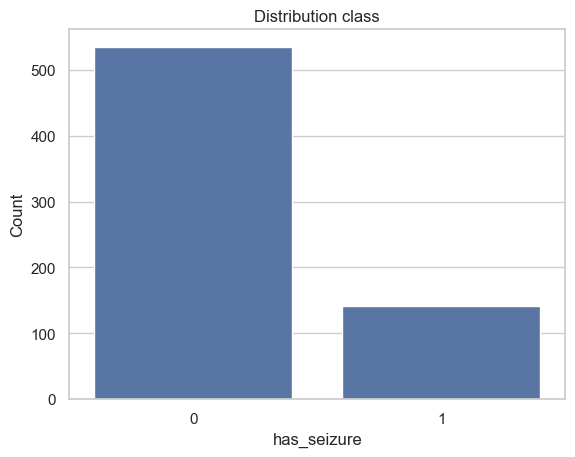

In [11]:
data['has_seizure'] = (data['num_seizures'] >= 1).astype(int)

sns.countplot(data=data, x='has_seizure')
plt.title('Distribution class')
plt.xlabel('has_seizure')
plt.ylabel('Count')

data = data.drop(['has_seizure'], axis=1)

In [12]:
data[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,676.0,676.000000,676.0,676.000000,676.000000
mean,0.0,0.000663,0.0,0.000032,0.001439
std,0.0,0.009998,0.0,0.000017,0.000577
min,0.0,0.000000,0.0,0.000008,0.000333
25%,0.0,0.000000,0.0,0.000021,0.001015
50%,0.0,0.000000,0.0,0.000028,0.001373
75%,0.0,0.000000,0.0,0.000040,0.001719
max,0.0,0.172414,0.0,0.000162,0.005549


In [13]:
data[data['flat_ratio'] >= 0.1]

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
343,chb12,chb12_27.edf,16:07:06,17:07:06,6,0.0,0.172414,"[3, 9, 13, 19, 23]",0.0,0.000088,0.003124,Normal
344,chb12,chb12_28.edf,17:07:12,18:07:12,1,0.0,0.137931,"[3, 9, 13, 19]",0.0,0.000090,0.001558,Normal
345,chb12,chb12_29.edf,18:07:19,19:07:43,6,0.0,0.137931,"[3, 9, 13, 19]",0.0,0.000125,0.002300,Normal


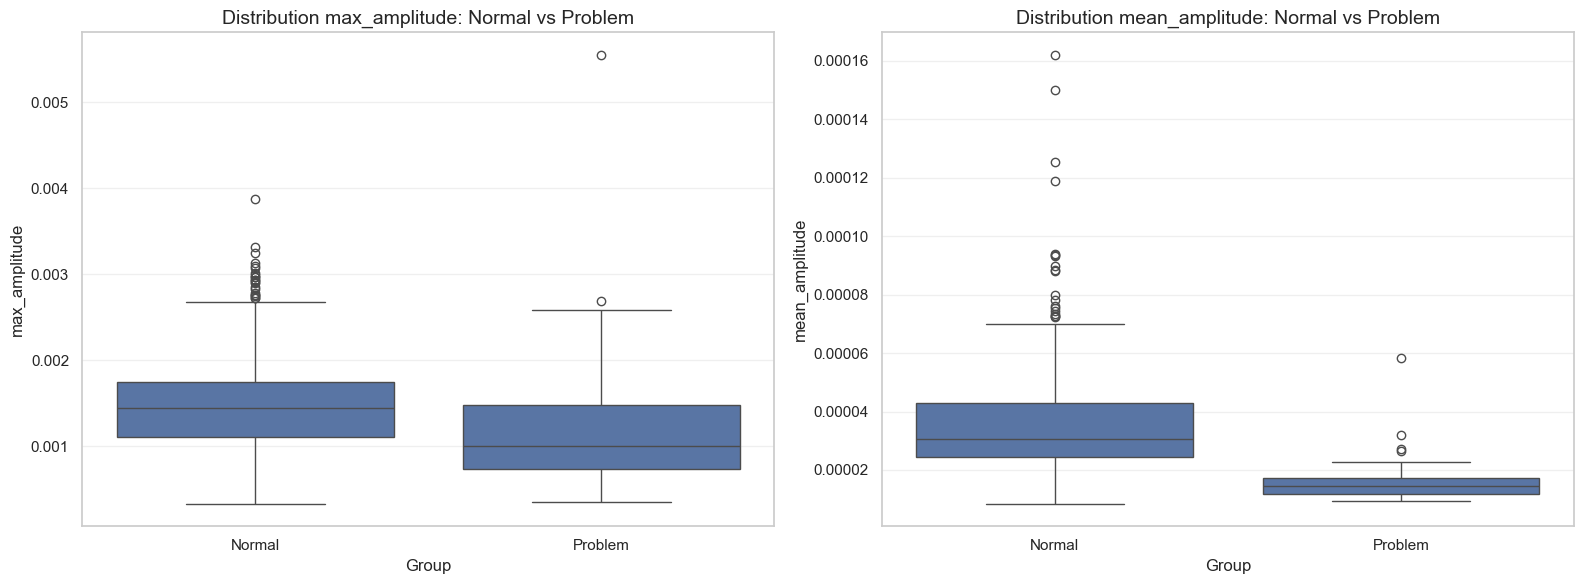

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(
    data=data,
    x='group',
    y='max_amplitude',
    ax=axes[0] 
)
axes[0].set_title('Distribution max_amplitude: Normal vs Problem', fontsize=14)
axes[0].set_xlabel('Group')
axes[0].set_ylabel('max_amplitude')
axes[0].grid(axis='y', alpha=0.3)

sns.boxplot(
    data=data,
    x='group',
    y='mean_amplitude',
    ax=axes[1] 
)
axes[1].set_title('Distribution mean_amplitude: Normal vs Problem', fontsize=14)
axes[1].set_xlabel('Group')
axes[1].set_ylabel('mean_amplitude')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


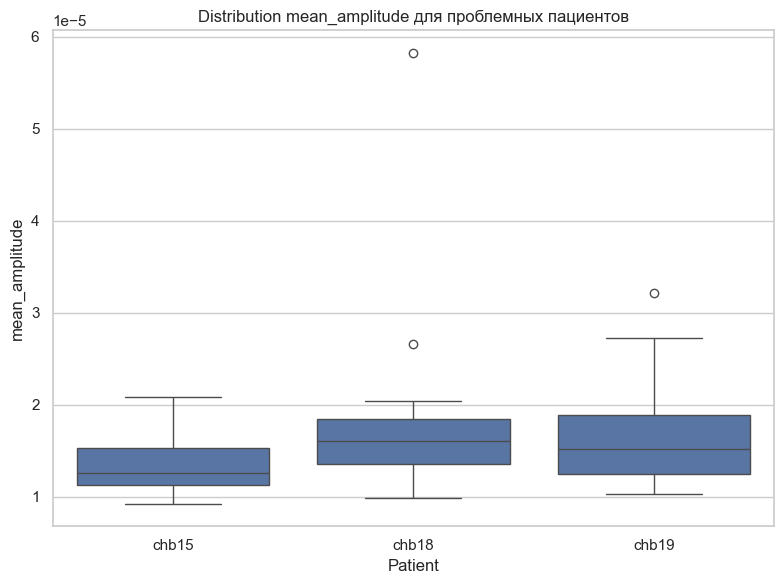

In [15]:
problem_patients = ['chb15', 'chb18', 'chb19']
subset = data[data['patient'].isin(problem_patients)]

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=subset,
    x='patient',
    y='mean_amplitude'
)

plt.title('Distribution mean_amplitude для проблемных пациентов')
plt.xlabel('Patient')
plt.ylabel('mean_amplitude')
plt.tight_layout()
plt.show()

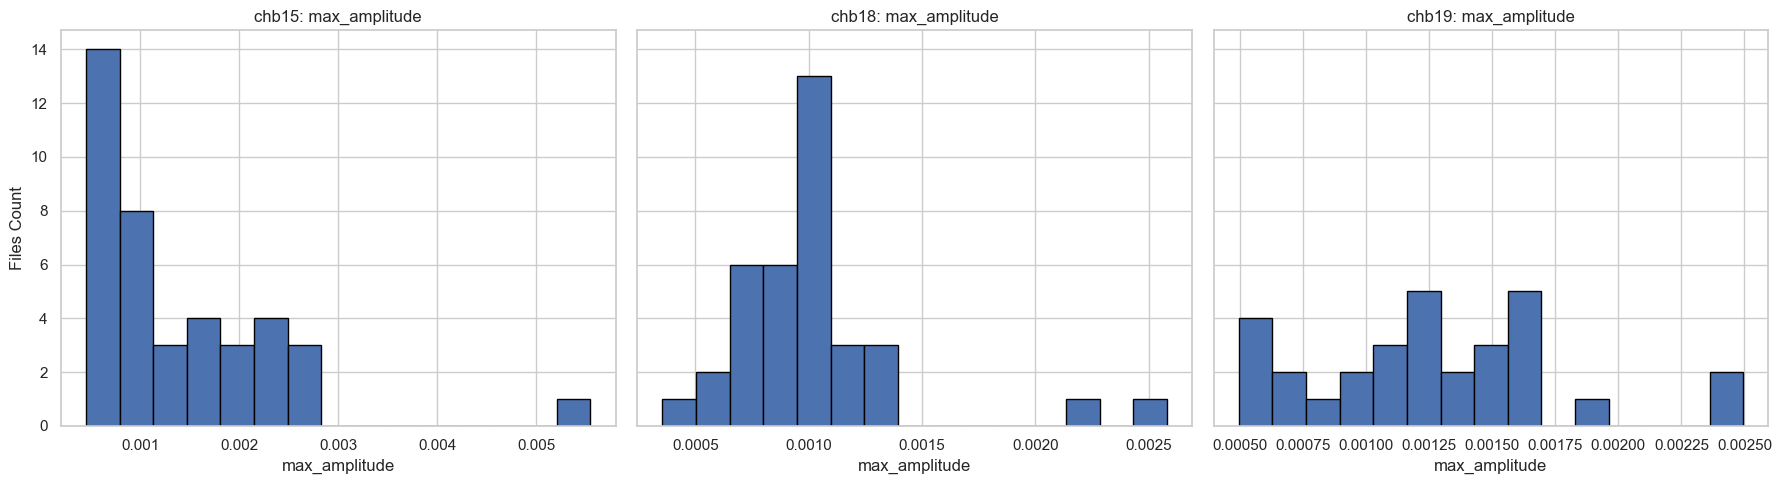

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, patient in zip(axes, ['chb15', 'chb18', 'chb19']):
    subset = data[data['patient'] == patient]
    ax.hist(subset['max_amplitude'], bins=15, edgecolor='black')
    ax.set_title(f'{patient}: max_amplitude')
    ax.set_xlabel('max_amplitude')
axes[0].set_ylabel('Files Count')
plt.tight_layout()
plt.show()

## Анализ распределения признаков

Цель: Сравнить распределения признаков между успешными и проблемными пациентами.

Группы признаков:

*	PSD bands (delta, theta, alpha, beta, gamma) — спектральная мощность
*	Relative power — относительная мощность по диапазонам
*	Statistical (mean, std, skewness, kurtosis) — статистические признаки
*	Hjorth (activity, mobility, complexity) — параметры Хьорта
*	Temporal (line_length, energy) — временные признаки

In [17]:
base_dir = r'C:\Users\_\Desktop\IT\epilepsy\outputs'
meta_cols = ['patient', 'edf_file', 't_start', 't_end', 'label', 'seizure_id']
psd = ['delta', 'theta', 'alpha', 'beta', 'gamma']
stat_features = ['mean', 'std', 'skewness', 'kurtosis', 'line_length', 'energy']
hjorth_features = ['activity', 'mobility', 'complexity']
problem_features_dict = {}

In [18]:
all_files = []

for patient in os.listdir(base_dir):
    patient_dir = os.path.join(base_dir, patient)
    if not os.path.isdir(patient_dir): 
        continue
    
    for file in os.listdir(patient_dir):
        if file.endswith('_features.csv'):
            csv_path = os.path.join(patient_dir, file)
            features = pd.read_csv(csv_path)
            
            feature_cols = [c for c in features.columns if c not in meta_cols]
            n_features = len(feature_cols)
            n_channels = n_features // 19 
            
            feature_names = []
            for ch in range(n_channels):
                for band in psd:
                    feature_names.append(f'ch{ch}_psd_{band}')
            for ch in range(n_channels):
                for band in psd:
                    feature_names.append(f'ch{ch}_rel_{band}')
            for ch in range(n_channels):
                for stat in stat_features:
                    feature_names.append(f'ch{ch}_{stat}')
            for ch in range(n_channels):
                for hj in hjorth_features:
                    feature_names.append(f'ch{ch}_hjorth_{hj}')
            
            rename_map = {old: new for old, new in zip(feature_cols, feature_names)}
            features_renamed = features.rename(columns=rename_map)
            
            agg_df = pd.DataFrame()
            agg_df[meta_cols] = features_renamed[meta_cols]
            
            for band in psd:
                cols = [c for c in features_renamed.columns if c.endswith(f'psd_{band}')]
                agg_df[f'psd_{band}'] = features_renamed[cols].mean(axis=1)
            
            for band in psd:
                cols = [c for c in features_renamed.columns if c.endswith(f'rel_{band}')]
                agg_df[f'rel_{band}'] = features_renamed[cols].mean(axis=1)
            
            agg_df['line_length'] = features_renamed.filter(regex='line_length$').mean(axis=1)
            agg_df['energy'] = features_renamed.filter(regex='energy$').mean(axis=1)
            agg_df['std'] = features_renamed.filter(regex='_std$').mean(axis=1)
            agg_df['kurtosis'] = features_renamed.filter(regex='kurtosis$').mean(axis=1)
            agg_df['skewness_mean'] = features_renamed.filter(regex='skewness$').mean(axis=1)
            
            for hj in hjorth_features:
                cols = features_renamed.filter(regex=rf'ch\d+_hjorth_{hj}$')
                if not cols.empty:
                    agg_df[f'hjorth_{hj}'] = cols.mean(axis=1)
                else:
                    agg_df[f'hjorth_{hj}'] = pd.NA
            all_files.append(agg_df)

full_dataset = pd.concat(all_files, ignore_index=True)
print(f"Загружено {len(full_dataset)} записей из {len(all_files)} файлов")
full_dataset.head()

Загружено 1504909 записей из 24 файлов


,patient,edf_file,t_start,t_end,label,seizure_id,psd_delta,psd_theta,psd_alpha,psd_beta,...,rel_beta,rel_gamma,line_length,energy,std,kurtosis,skewness_mean,hjorth_activity,hjorth_mobility,hjorth_complexity
0,chb01,chb01_01.edf,0.0,4.0,0,0,1.326521e-10,3.814545e-11,9.941598e-12,6.833621e-12,...,0.109781,0.068197,0.006506,1.433142e-06,0.000034,0.676090,0.057887,1.364183e-09,0.259070,0.712728
1,chb01,chb01_01.edf,2.0,6.0,0,0,4.434615e-11,1.982348e-11,8.016547e-12,1.050168e-11,...,0.222846,0.163120,0.008190,7.117215e-07,0.000025,0.915783,0.301629,6.943277e-10,0.384420,0.523093
2,chb01,chb01_01.edf,4.0,8.0,0,0,2.921967e-10,2.880948e-11,8.768935e-12,7.379027e-12,...,0.109110,0.074025,0.007272,1.449188e-06,0.000033,1.528394,0.030597,1.414556e-09,0.292726,0.876443
3,chb01,chb01_01.edf,6.0,10.0,0,0,5.444688e-10,7.869548e-11,8.952188e-12,4.554142e-12,...,0.072527,0.038713,0.005627,2.286992e-06,0.000039,2.480516,0.619979,2.231427e-09,0.226778,1.058138
4,chb01,chb01_01.edf,8.0,12.0,0,0,5.981187e-10,1.210229e-10,1.722867e-11,1.065086e-11,...,0.092634,0.074458,0.007511,2.993289e-06,0.000046,3.699934,0.421207,2.922604e-09,0.277940,1.348405


### Пропущенные значения

In [19]:
full_dataset.isna().sum()

patient                  0
edf_file                 0
t_start                  0
t_end                    0
label                    0
seizure_id               0
psd_delta                0
psd_theta                0
psd_alpha                0
psd_beta                 0
psd_gamma                0
rel_delta                0
rel_theta                0
rel_alpha                0
rel_beta                 0
rel_gamma                0
line_length              0
energy                   0
std                      0
kurtosis                 0
skewness_mean            0
hjorth_activity      25246
hjorth_mobility      25246
hjorth_complexity    25246
dtype: int64

### Датасет для анализа данных

In [20]:
data = pd.merge(full_dataset, data[['patient', 'edf_file', 'group']], on=['patient', 'edf_file'], how='left')

normal_features = data[data['group'] == 'Normal']
problem_features = data[data['group'] == 'Problem']

data = pd.concat([normal_features, problem_features], ignore_index=True)
data

,patient,edf_file,t_start,t_end,label,seizure_id,psd_delta,psd_theta,psd_alpha,psd_beta,...,rel_gamma,line_length,energy,std,kurtosis,skewness_mean,hjorth_activity,hjorth_mobility,hjorth_complexity,group
0,chb01,chb01_01.edf,0.0,4.0,0,0,1.326521e-10,3.814545e-11,9.941598e-12,6.833621e-12,...,0.068197,0.006506,1.433142e-06,0.000034,0.676090,0.057887,1.364183e-09,0.259070,0.712728,Normal
1,chb01,chb01_01.edf,2.0,6.0,0,0,4.434615e-11,1.982348e-11,8.016547e-12,1.050168e-11,...,0.163120,0.008190,7.117215e-07,0.000025,0.915783,0.301629,6.943277e-10,0.384420,0.523093,Normal
2,chb01,chb01_01.edf,4.0,8.0,0,0,2.921967e-10,2.880948e-11,8.768935e-12,7.379027e-12,...,0.074025,0.007272,1.449188e-06,0.000033,1.528394,0.030597,1.414556e-09,0.292726,0.876443,Normal
3,chb01,chb01_01.edf,6.0,10.0,0,0,5.444688e-10,7.869548e-11,8.952188e-12,4.554142e-12,...,0.038713,0.005627,2.286992e-06,0.000039,2.480516,0.619979,2.231427e-09,0.226778,1.058138,Normal
4,chb01,chb01_01.edf,8.0,12.0,0,0,5.981187e-10,1.210229e-10,1.722867e-11,1.065086e-11,...,0.074458,0.007511,2.993289e-06,0.000046,3.699934,0.421207,2.922604e-09,0.277940,1.348405,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504904,chb19,chb19_30.edf,3086.0,3090.0,1,3,8.531090e-11,2.068207e-11,8.001801e-12,1.158634e-12,...,0.002645,0.002250,6.108149e-07,0.000024,0.338212,0.191344,5.937256e-10,0.120603,0.000000,Problem
1504905,chb19,chb19_30.edf,3088.0,3092.0,1,3,8.057060e-11,1.840821e-11,5.834284e-12,7.638155e-13,...,0.003362,0.001966,4.299759e-07,0.000020,0.337491,-0.114324,4.184346e-10,0.123288,0.000000,Problem
1504906,chb19,chb19_30.edf,3090.0,3094.0,1,3,1.268177e-10,2.938126e-11,6.950486e-12,8.574902e-13,...,0.002668,0.002347,1.353532e-06,0.000035,6.470258,1.029748,1.316571e-09,0.096042,0.000000,Problem
1504907,chb19,chb19_30.edf,3092.0,3096.0,1,3,8.383122e-10,9.322885e-11,1.559384e-11,1.410288e-12,...,0.000799,0.003208,3.803462e-06,0.000058,0.912457,0.203828,3.702229e-09,0.077054,0.000000,Problem


In [37]:
psd_features = ['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma']
stat_features = ['std', 'kurtosis', 'skewness_mean', 'line_length', 'energy']
hjorth_params = ['hjorth_activity', 'hjorth_mobility', 'hjorth_complexity']

normal_data = data[data['group'] == 'Normal']
problem_data = data[data['group'] == 'Problem']

print(f"Normal patients: {normal_data['patient'].nunique()} пациентов, {len(normal_data)} записей")
print(f"Problem patients: {problem_data['patient'].nunique()} пациентов, {len(problem_data)} записей")

Normal patients: 21 пациентов, 1343111 записей
Problem patients: 3 пациентов, 161798 записей


### PSD Features

In [ ]:
# PSD признаки - overlay всех групп
groups = [
    ('chb15', problem_data[problem_data['patient'] == 'chb15']),
    ('chb18', problem_data[problem_data['patient'] == 'chb18']),
    ('chb19', problem_data[problem_data['patient'] == 'chb19']),
    ('Normal', normal_data)
]

fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('PSD признаки - сравнение групп', fontsize=16)

for i, f in enumerate(psd_features):
    all_vals = []
        vals = df[f]
        vals_log = np.log1].dropna()(vals[vals > 0])
        all_vals.extend(vals_log)
    axes[i].set_xlim(-14, -5)

axes[0].set_ylabel('Density')
plt.tight_layout()
plt.show()638fontsize
    # xlim по 1-99 перцентилю для приближения
    lo, hi = np.percentile(all_vals, [1, 99])=80,lo, hi

IndentationError: unexpected indent (745171877.py, line 13)

###  Hjorth Features 

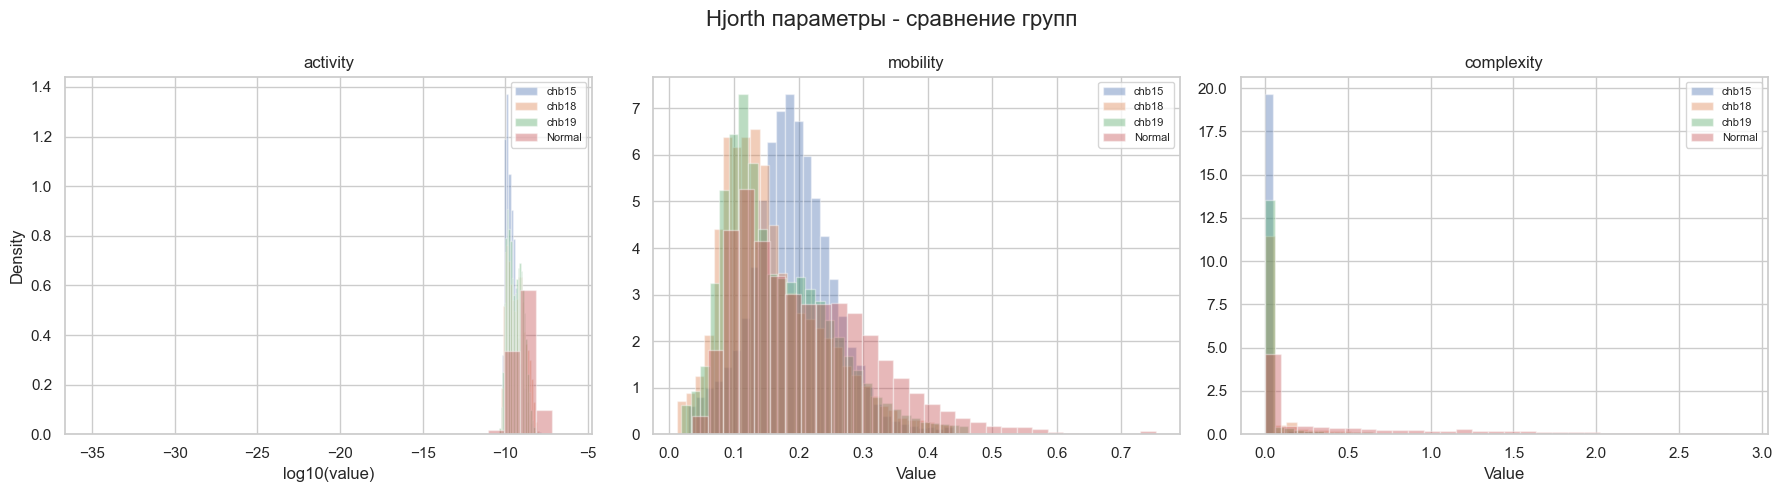

In [74]:
# Hjorth параметры - overlay всех групп
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Hjorth параметры - сравнение групп', fontsize=16)

for i, f in enumerate(hjorth_params):
    for name, df in groups:
        vals = df[f].dropna()
        if f == 'hjorth_activity':
            vals = np.log10(vals[vals > 0])
        else:
            lo, hi = np.percentile(vals, [1, 99])
            vals = vals[(vals >= lo) & (vals <= hi)]
        axes[i].hist(vals, bins=30, alpha=0.4, label=name, density=True)
    axes[i].set_title(f.replace('hjorth_', ''))
    axes[i].set_xlabel('log10(value)' if f == 'hjorth_activity' else 'Value')
    axes[i].legend(fontsize=8)

axes[0].set_ylabel('Density')
plt.tight_layout()
plt.show()

### Statistical Features

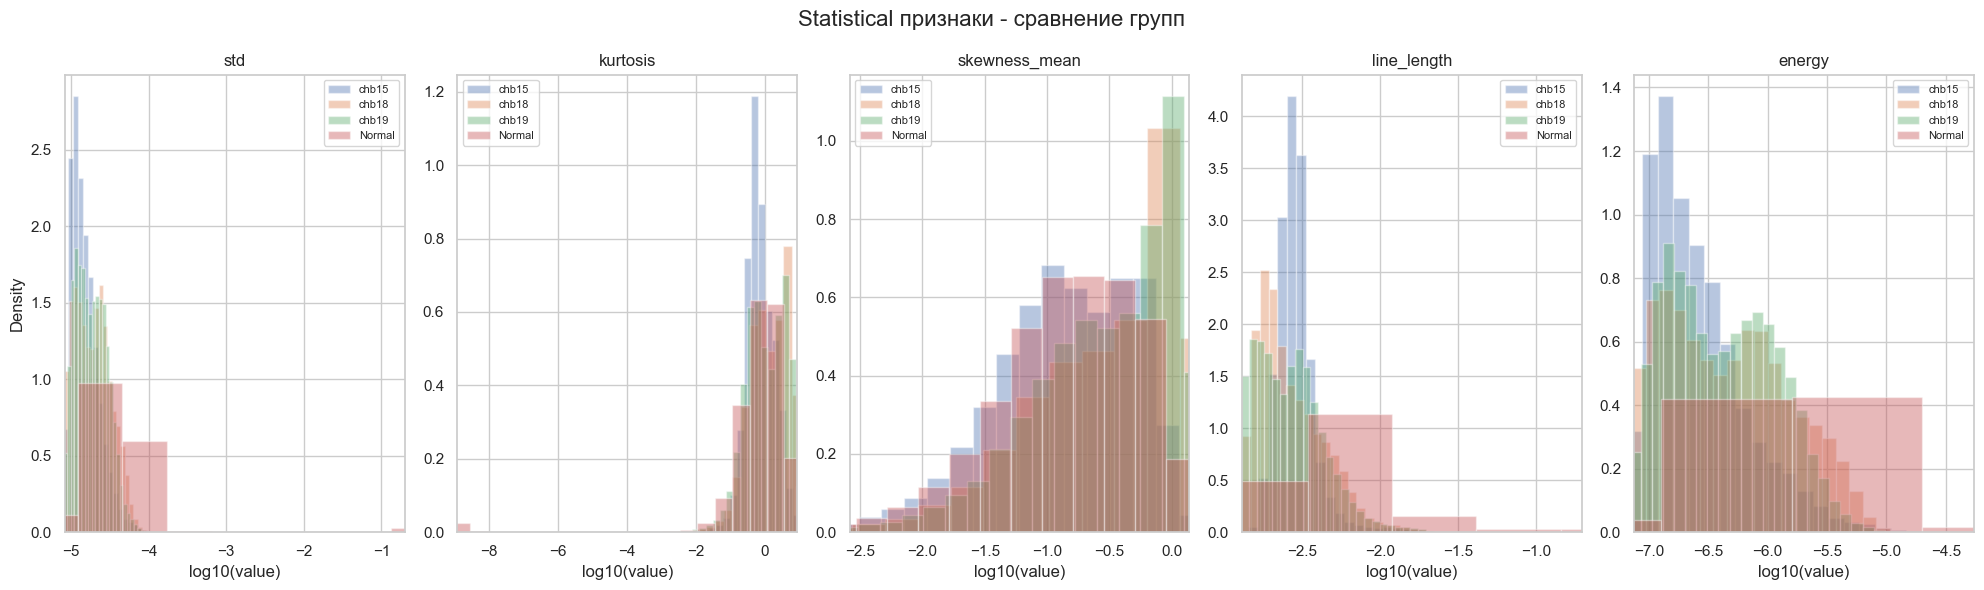

In [75]:
# Statistical признаки - overlay всех групп
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Statistical признаки - сравнение групп', fontsize=16)

for i, f in enumerate(stat_features):
    all_vals = []
    for name, df in groups:
        vals = df[f].dropna()
        vals_log = np.log10(vals[vals > 0])
        all_vals.extend(vals_log)
        axes[i].hist(vals_log, bins=30, alpha=0.4, label=name, density=True)
    lo, hi = np.percentile(all_vals, [1, 99])
    axes[i].set_xlim(lo, hi)
    axes[i].set_title(f)
    axes[i].set_xlabel('log10(value)')
    axes[i].legend(fontsize=8)

axes[0].set_ylabel('Density')
plt.tight_layout()
plt.show()

## Анализ баланса классов (preictal / interictal)

Цель: Проверить корректность разметки и баланса классов

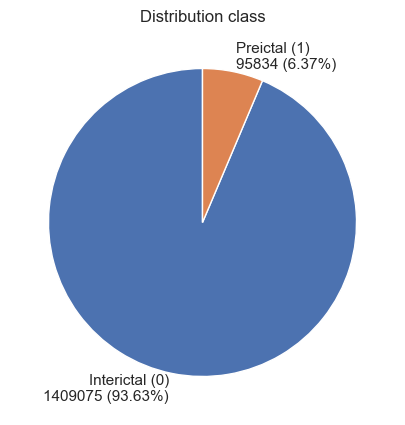

In [49]:
counts = data['label'].value_counts().sort_index()
total = counts.sum()
plt.figure(figsize=(8, 5))
plt.pie(
    counts,
    labels=[f'Interictal (0)\n{counts[0]} ({counts[0]/total:.2%})',
            f'Preictal (1)\n{counts[1]} ({counts[1]/total:.2%})'],
    startangle=90
)
plt.title('Distribution class')
plt.show()

chb15: interictal=46775, preictal=6701 (12.5%)
chb18: interictal=53975, preictal=3917 (6.8%)
chb19: interictal=48573, preictal=1857 (3.7%)


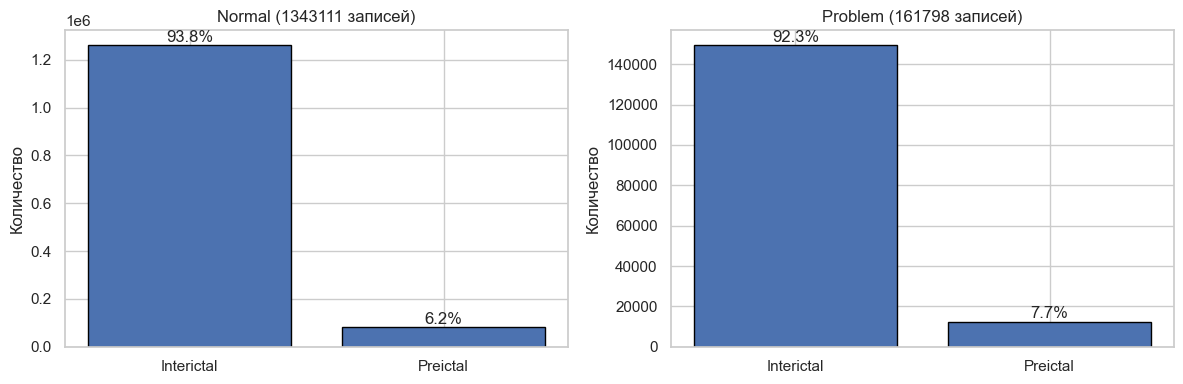

In [ ]:
counts = problem_data.groupby(['patient', 'label']).size().unstack(fill_value=0)
counts.columns = ['interictal', 'preictal']

for p in ['chb15', 'chb18', 'chb19']:
    total = counts.loc[p].sum()
    preictal_pct = counts.loc[p, 'preictal'] / total * 100
    print(f"{p}: interictal={counts.loc[p, 'interictal']}, preictal={counts.loc[p, 'preictal']} ({preictal_pct:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, (name, df) in enumerate([('Normal', normal_data), ('Problem', problem_data)]):
    counts = df['label'].value_counts().sort_index()
    axes[i].bar(['Interictal', 'Preictal'], counts.values, edgecolor='black')
    axes[i].set_title(f'{name} ({len(df)} записей)')
    axes[i].set_ylabel('Количество')
    total = counts.sum()
    for j, v in enumerate(counts.values):
        axes[i].text(j, v + total*0.01, f'{v/total*100:.1f}%', ha='center')
plt.tight_layout()
plt.show()